In [1]:
%pip install scikit-image numpy scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
from skimage.feature import hog
from skimage import data, exposure ,color,io
import os

image_directory_empty = './parkinglots/notbusy'
image_directory_busy = './parkinglots/busy'

empty_image_files = [os.path.join(image_directory_empty, f) for f in os.listdir(image_directory_empty) if f.endswith(('.png', '.jpg', '.jpeg'))]
busy_image_files = [os.path.join(image_directory_busy, f) for f in os.listdir(image_directory_busy) if f.endswith(('.png', '.jpg', '.jpeg'))]

image_files = empty_image_files + busy_image_files

labels =[]

# 1 for kinda busy, 0 for kinda empty
for image_file in empty_image_files:
  labels.append(0)
for image_file in busy_image_files:
  labels.append(1)

hog_features=[]
for image_file in image_files:
  image = io.imread(image_file)
  hog_features.append(hog(color.rgb2gray(image), pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, feature_vector=True))



In [3]:
import numpy as np

features = np.array(hog_features)  # Shape should be (n_samples, n_features)
labels = np.array(labels)

In [4]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

In [15]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
C_values = [0.01, 0.1, 1.0]

results = {}

for C in C_values:
    print(f"Training model with C={C}")
    clf = LinearSVC(C=C, max_iter=10000)
    clf.fit(X_train, y_train)
    
   
    y_val_pred = clf.predict(X_val)
    y_pred = clf.predict(X_test)
    

    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
 
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='weighted')
    test_recall = recall_score(y_test, y_pred, average='weighted')
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[C] = {
        'val_accuracy': val_accuracy,
        'val_precision': val_precision,
        'val_recall': val_recall,
        'val_f1': val_f1,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1
    }
    
    print(f"Validation Accuracy for C={C}: {val_accuracy:.2f}")
    print(f"Test Accuracy for C={C}: {test_accuracy:.2f}")



Training model with C=0.01
Validation Accuracy for C=0.01: 1.00
Test Accuracy for C=0.01: 1.00
Training model with C=0.1
Validation Accuracy for C=0.1: 1.00
Test Accuracy for C=0.1: 1.00
Training model with C=1.0
Validation Accuracy for C=1.0: 1.00
Test Accuracy for C=1.0: 1.00


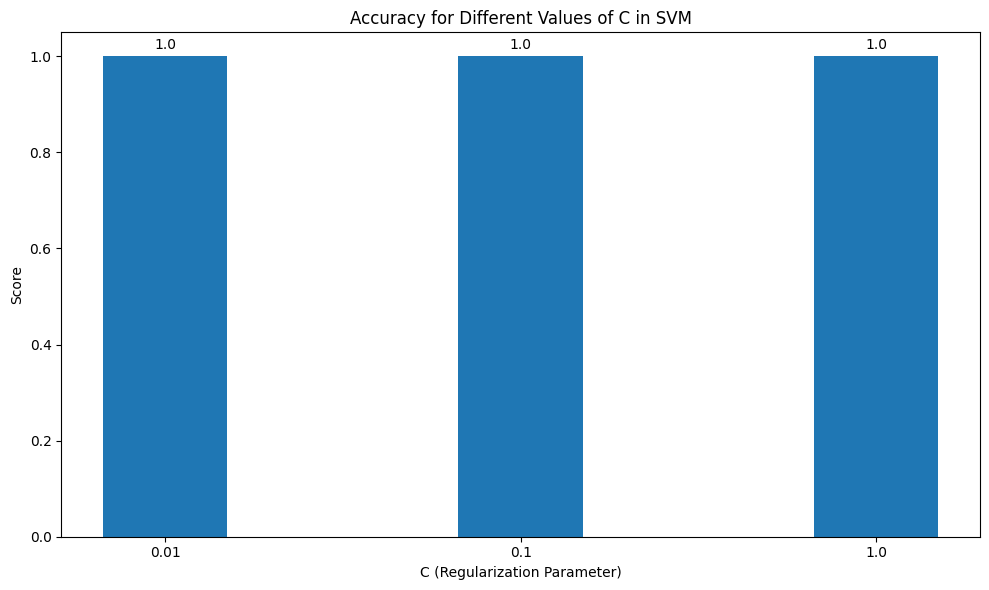

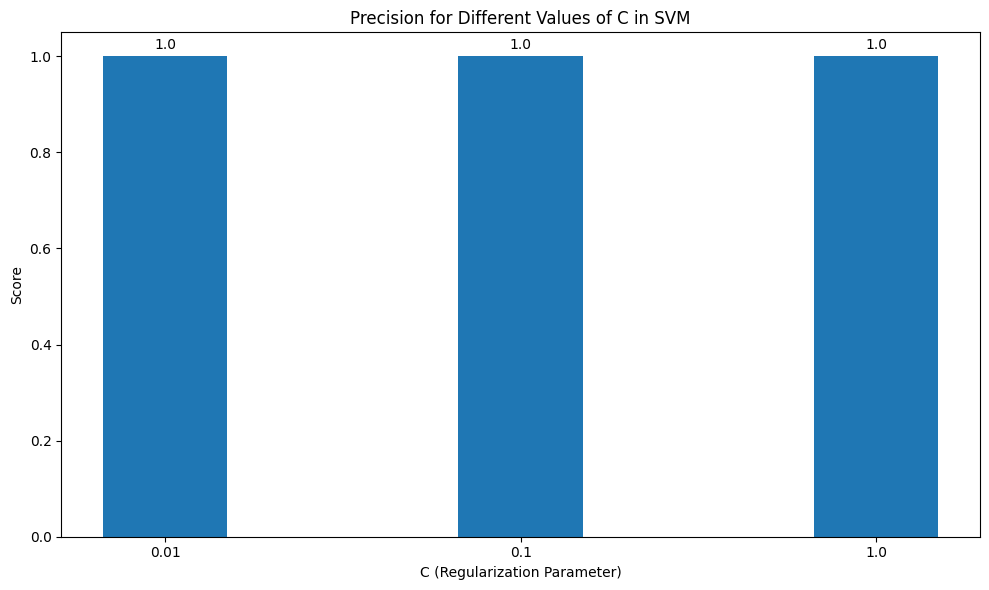

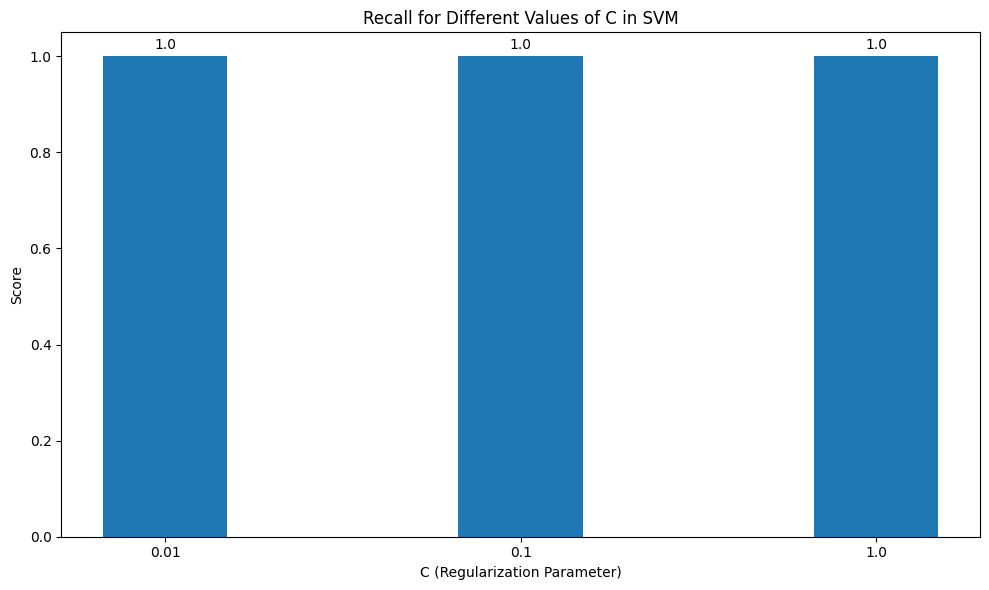

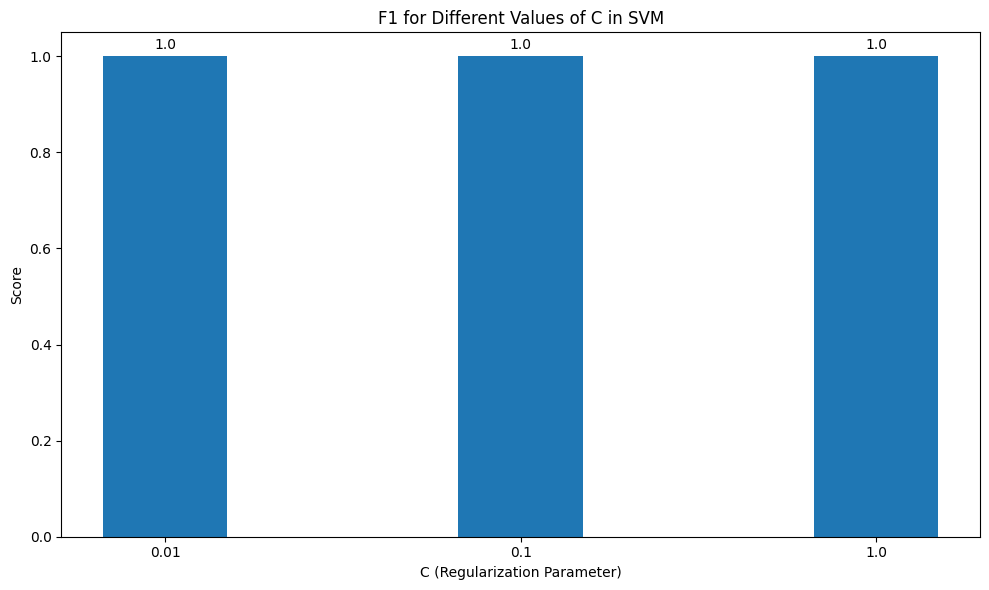

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    test_values = [results[C][f'test_{metric}'] for C in C_values]
    
    x = np.arange(len(C_values))  
    width = 0.35  

    fig, ax = plt.subplots(figsize=(10, 6))
    rects = ax.bar(x, test_values, width, label='Test')

  
    ax.set_xlabel('C (Regularization Parameter)')
    ax.set_ylabel('Score')
    ax.set_title(f'{metric.capitalize()} for Different Values of C in SVM')
    ax.set_xticks(x)
    ax.set_xticklabels(C_values)

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects)
    fig.tight_layout()
    plt.show()

In [20]:
image_path = './A.jpg'

image = io.imread(image_path)
hog_features2 = hog(color.rgb2gray(image), pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, feature_vector=True)

hog_features_new = np.array(hog_features2)

hog_features_new = hog_features_new.reshape(1, -1)

# Make the prediction
prediction = clf.predict(hog_features_new)

# Print the prediction
print(f"Prediction for {os.path.basename(image_path)}: {"Busy" if prediction == 1 else 'Not busy'}")

Prediction for A.jpg: Not busy


In [21]:
import joblib

# Save the trained model to a file
joblib.dump(clf, "linear_svc_model.joblib")

['linear_svc_model.joblib']